In [127]:
import sys
!{sys.executable} -m pip install statsbombpy
from statsbombpy import sb


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
comps = sb.competitions()
comps[comps["competition_name"]=="Premier League"]
comps.sort_values(by="season_name",ascending=False).head(10)
comp_match_counts = {}
for _, row in comps.sort_values(by="season_name",ascending=False).head(20).iterrows():
    matches = sb.matches(row["competition_id"], row["season_id"])
    comp_match_counts[f"{row['competition_name']} ({row['season_name']})"] = len(matches)
comp_match_counts


{'Copa America (2024)': 32,
 'UEFA Euro (2024)': 51,
 '1. Bundesliga (2023/2024)': 34,
 'African Cup of Nations (2023)': 52,
 "Women's World Cup (2023)": 64,
 'Major League Soccer (2023)': 6,
 'Ligue 1 (2022/2023)': 32,
 "UEFA Women's Euro (2022)": 31,
 'FIFA World Cup (2022)': 64,
 'Ligue 1 (2021/2022)': 26,
 'Indian Super league (2021/2022)': 115,
 "FA Women's Super League (2020/2021)": 131,
 'La Liga (2020/2021)': 35,
 'UEFA Euro (2020)': 51,
 'La Liga (2019/2020)': 33,
 "FA Women's Super League (2019/2020)": 87,
 "Women's World Cup (2019)": 52,
 'Champions League (2018/2019)': 1,
 'La Liga (2018/2019)': 34,
 "FA Women's Super League (2018/2019)": 108}

In [129]:
comps[comps["competition_name"]=="UEFA Euro"]
sb.matches(55, 282)
sb.events(3942819)['type'].value_counts()


type
Pass                 1065
Ball Receipt*        1020
Carry                 910
Pressure              173
Ball Recovery          55
Duel                   46
Block                  27
Foul Won               23
Foul Committed         23
Goal Keeper            19
Miscontrol             16
Interception           16
Shot                   16
Dispossessed           14
Dribble                12
Clearance              12
Substitution            9
Injury Stoppage         5
Half Start              4
Half End                4
Bad Behaviour           3
Dribbled Past           3
Referee Ball-Drop       2
50/50                   2
Tactical Shift          2
Starting XI             2
Player On               1
Player Off              1
Name: count, dtype: int64

In [130]:
comps[comps["competition_name"]=="Premier League"]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851
65,2,44,England,Premier League,male,False,False,2003/2004,2024-03-08T14:49:13.195793,2021-06-13T16:17:31.694,None,2024-03-08T14:49:13.195793


In [131]:
print("Amount of Games: ",sb.matches(2,27).shape[0])
sb.matches(2,27).head()

Amount of Games:  380


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [132]:
ordered_events =  sb.events(3754058).sort_values(by=["period","timestamp"],ascending=[True,True])

In [133]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np
import pandas as pd

# Preprocessing

In [134]:
ordered_events = ordered_events[~ordered_events["location"].isna()]

In [136]:
outcome_cols = ['ball_recovery_recovery_failure','dribble_outcome','duel_outcome',"interception_outcome","pass_outcome","shot_outcome"]
end_coord_cols = ['pass_end_location','carry_end_location','shot_end_location']
events = {
    "Pass": {"outcome": {'col':'pass_outcome',False:{'Out', 'Incomplete', 'Unknown', 'Injury Clearance',
       'Pass Offside'}}, 'end_loc': 'pass_end_location'},
    "Carry": {'end_loc': 'carry_end_location'},
    "Ball Recovery": {"outcome": {'col':'ball_recovery_recovery_failure',False:{True}}},
    "Duel": {"outcome": {'col':'duel_outcome',False:{'Lost','Lost In Play','Lost Out',np.nan}}},
    "Clearance": {},
    "Miscontrol": {},
    "Dribble": {"outcome": {'col':'dribble_outcome',False:{'Incomplete'}}},
    "Shot": {"outcome": {'col':'shot_outcome',False:{'Off T','Post','Saved','Wayward','Blocked'}}},
    "Interception": {"outcome": {'col':'interception_outcome',False:{'Lost','Lost In Play','Lost Out',}}},
    "Foul Committed": {}
}
cols = [col for col in ordered_events.columns if any([event.lower().replace(" ","_") in col.lower() for event in events.keys()])] + ["type","possession","possession_team","team",'team_id',"location","timestamp","period","duration","id","match_id","minute","second",'player','player_id','under_pressure','period','position']
cols =sorted(cols)
ordered_events = ordered_events[ordered_events["type"].isin(events.keys())][cols]

#make one outcome column
def get_outcome(row):
    event_type = row["type"]
    event_dict = events.get(event_type)
    if "outcome" in event_dict:
        outcome_col = event_dict["outcome"]["col"]
        if row.get(outcome_col, None) in event_dict["outcome"][False]:
            return False
        return True

    return np.nan

ordered_events["outcome"] = ordered_events.apply(get_outcome, axis=1)
ordered_events['outcome'].unique()


#make one end_loc column
def get_end_loc(row):
    event_type = row["type"]
    event_dict = events.get(event_type)
    if "end_loc" in event_dict:
        return row.get(event_dict["end_loc"], None)
    return np.nan

ordered_events["end_loc"] = ordered_events.apply(get_end_loc, axis=1)


In [138]:
#change type of event for special pass types
special_pass_types = ['Corner', 'Free Kick', 'Throw-in',"Goal Kick"]
ordered_events.loc[ordered_events["pass_type"].isin(special_pass_types), "type"] = ordered_events["pass_type"]

In [139]:
# Split events by team
away_team = ordered_events[ordered_events["team"] == "Leicester City"].copy()
home_team = ordered_events[ordered_events["team"] == "AFC Bournemouth"].copy()

# Function to flip coordinates
def flip_coordinates(coords):
    if isinstance(coords, list):
        return [120 - coords[0], 80 - coords[1]]
    return coords

# Flip all coordinate columns for away team
coordinate_columns = ["location", "end_loc"]
for column in coordinate_columns:
    away_team[column] = away_team[column].apply(flip_coordinates)

# Combine home and away events
ordered_events = pd.concat([home_team, away_team])


# Visualizing Possessions

In [147]:
ordered_events[ordered_events["possession"]==6][["type","pass_outcome","pass_type","duel_outcome","team","possession_team"]]

,type,pass_outcome,pass_type,duel_outcome,team,possession_team
62,Throw-in,NaN,Throw-in,NaN,AFC Bournemouth,AFC Bournemouth
63,Carry,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
64,Pass,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
65,Carry,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
66,Pass,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
67,Carry,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
68,Pass,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
69,Carry,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
70,Pass,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth
71,Carry,NaN,NaN,NaN,AFC Bournemouth,AFC Bournemouth


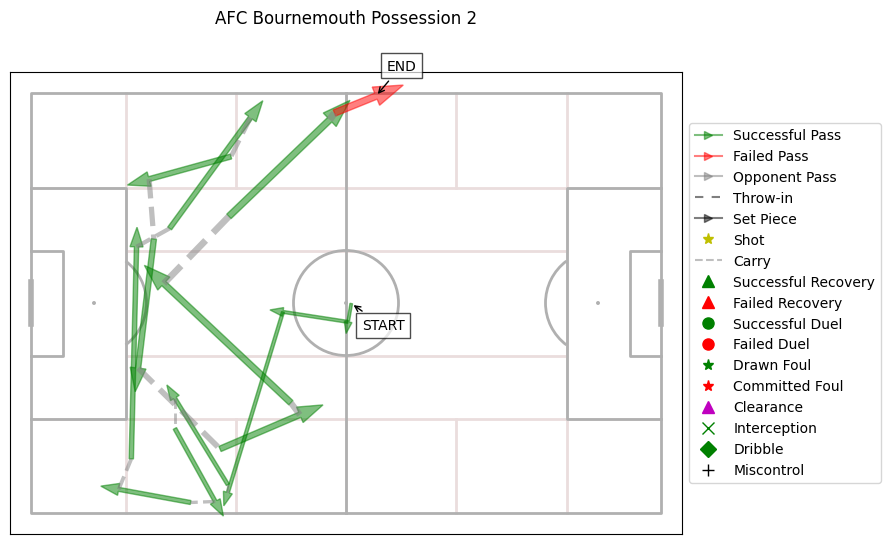

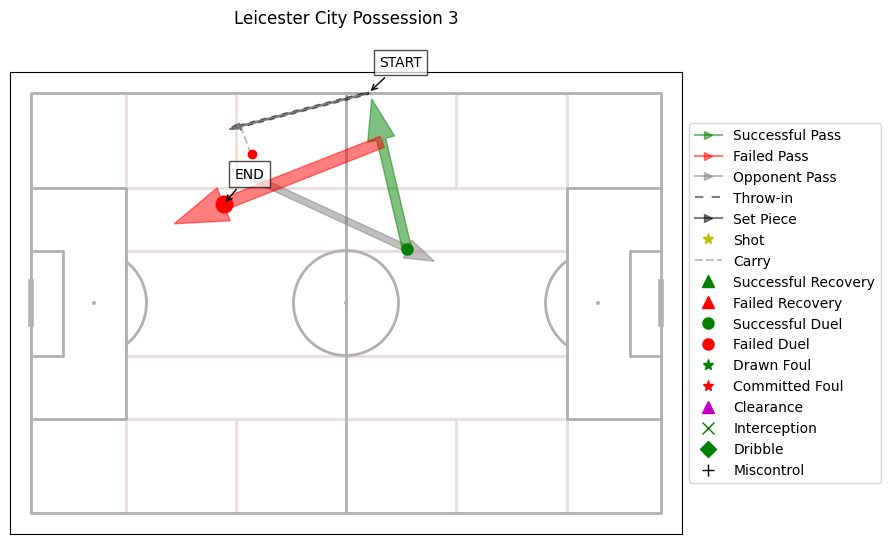

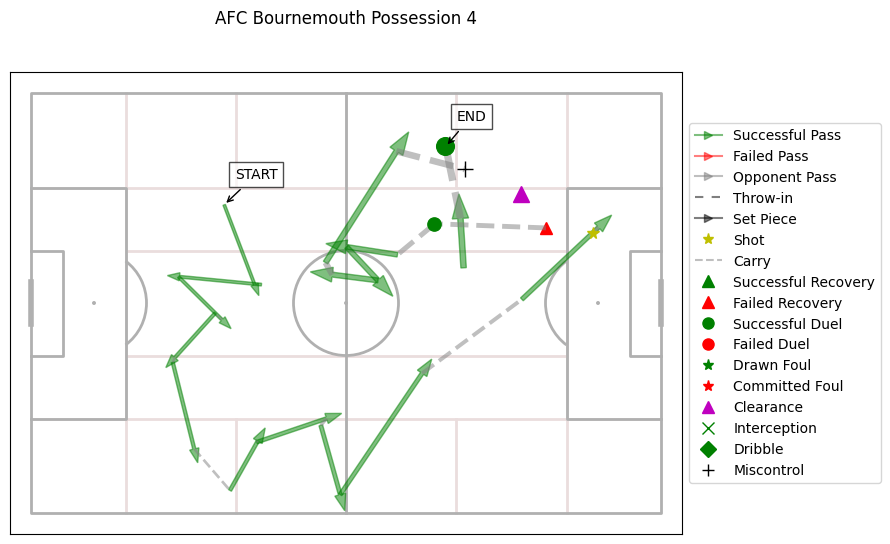

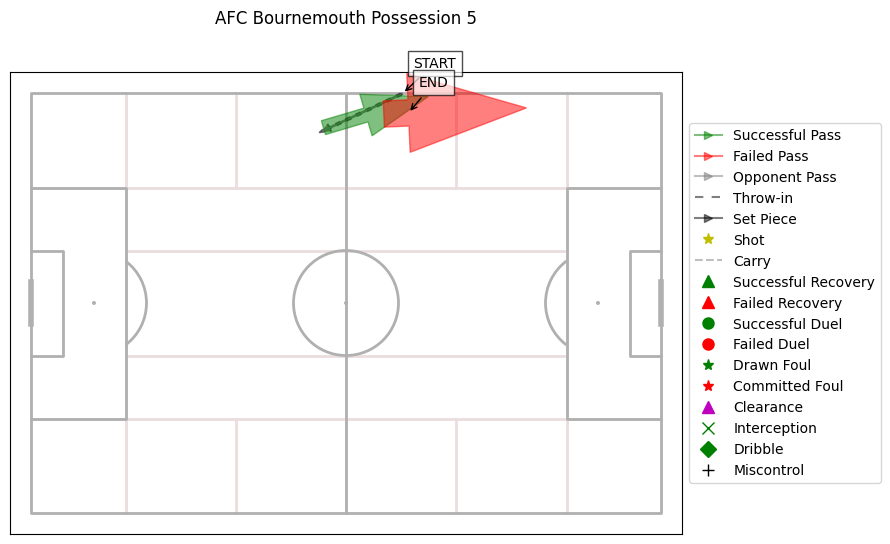

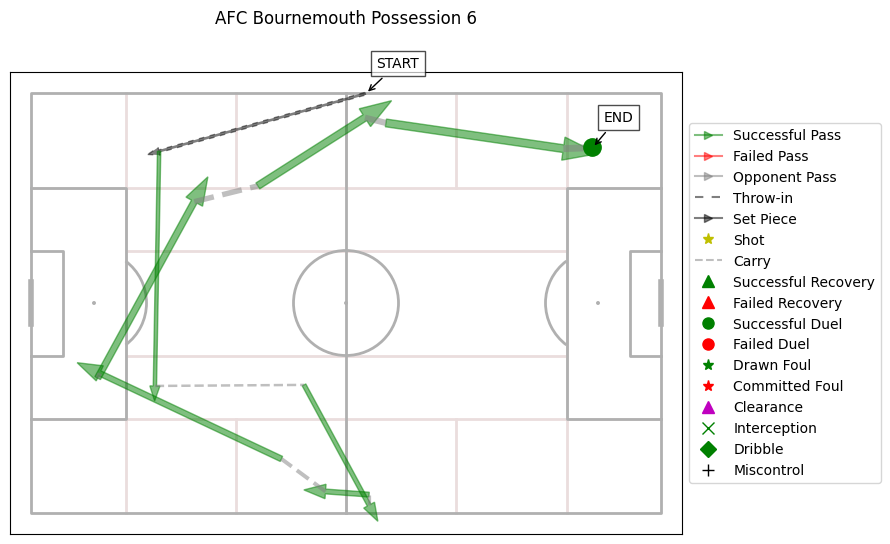

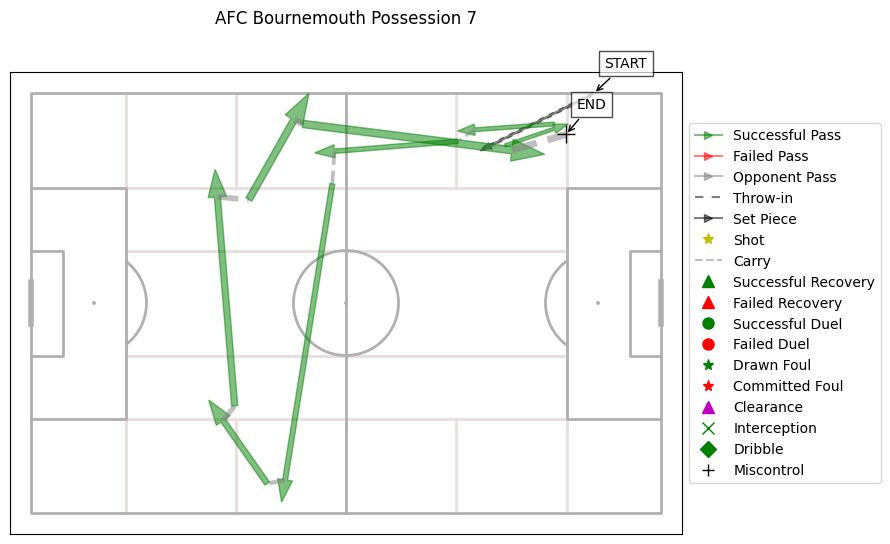

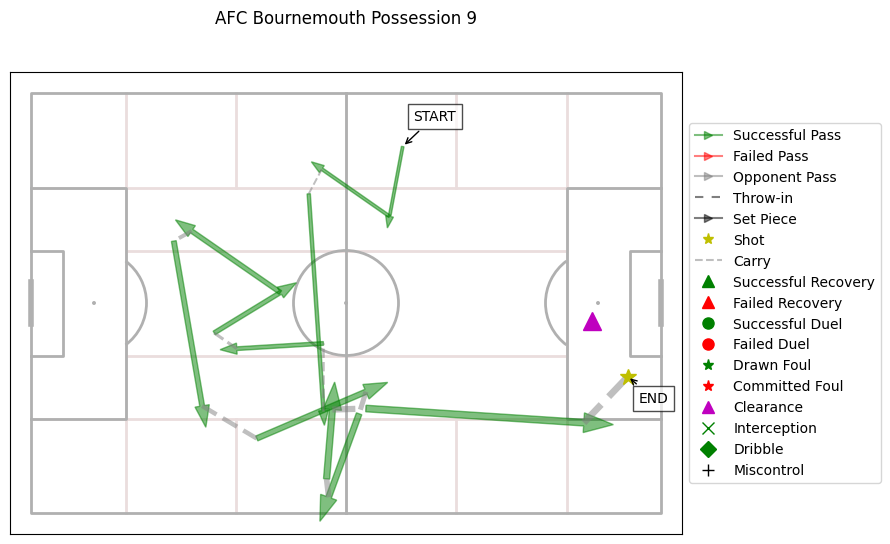

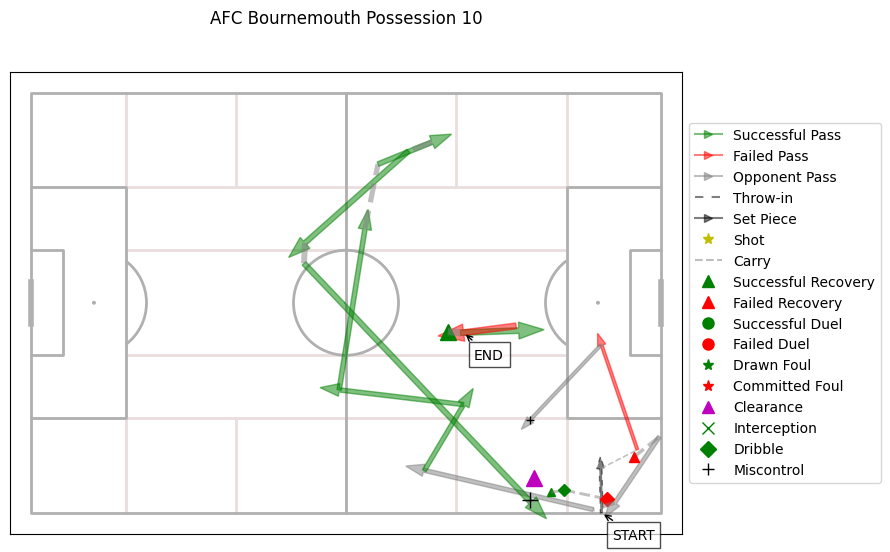

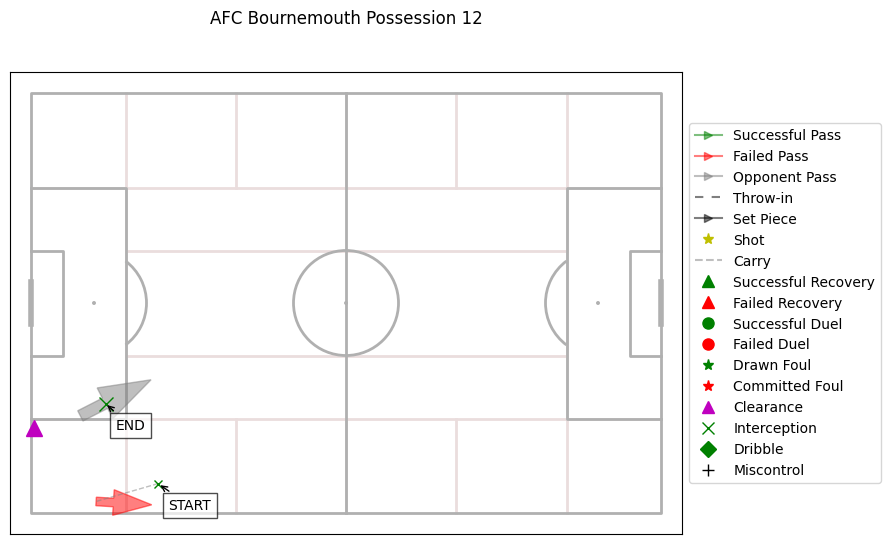

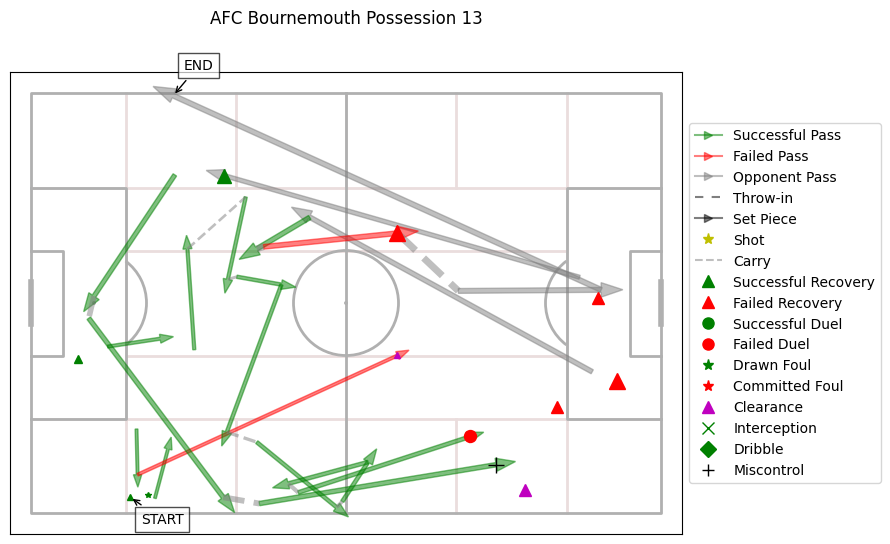

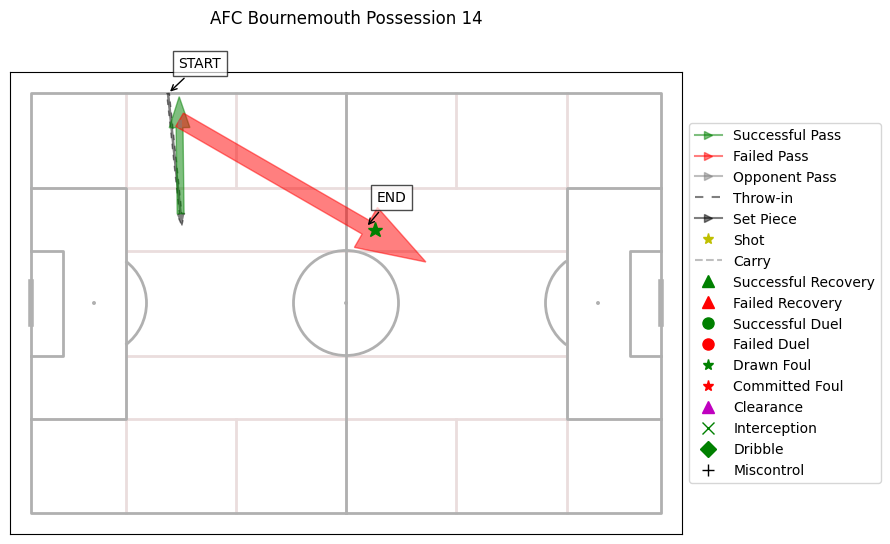

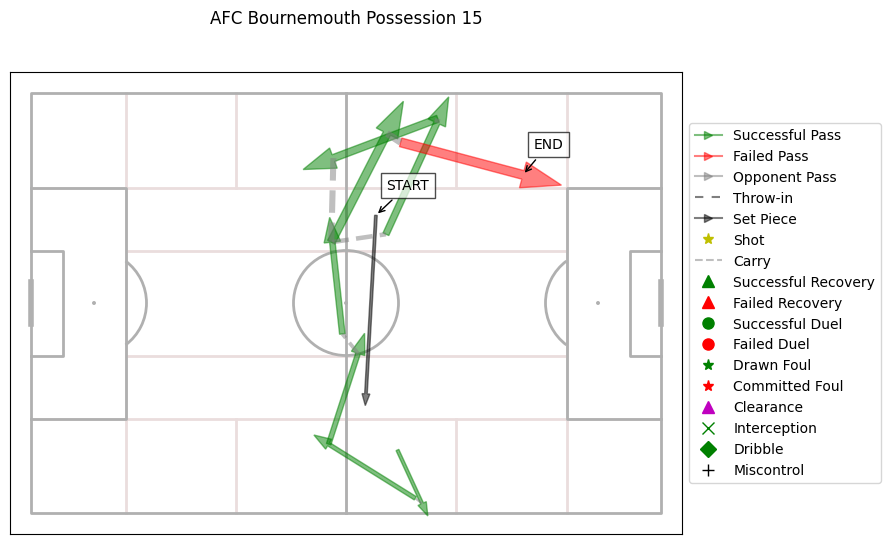

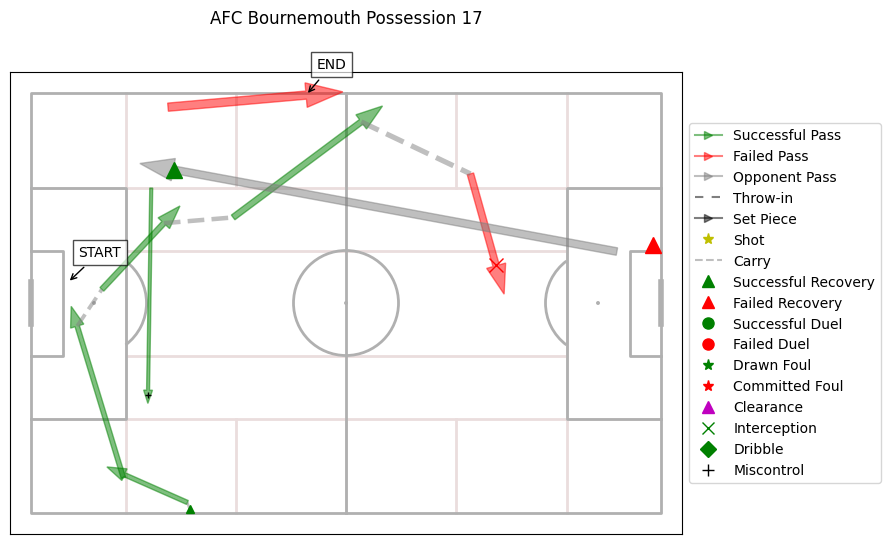

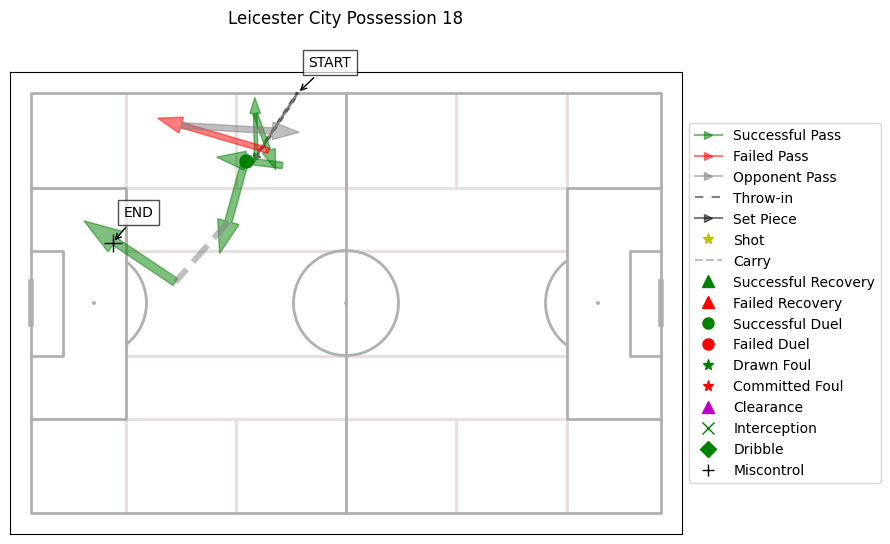

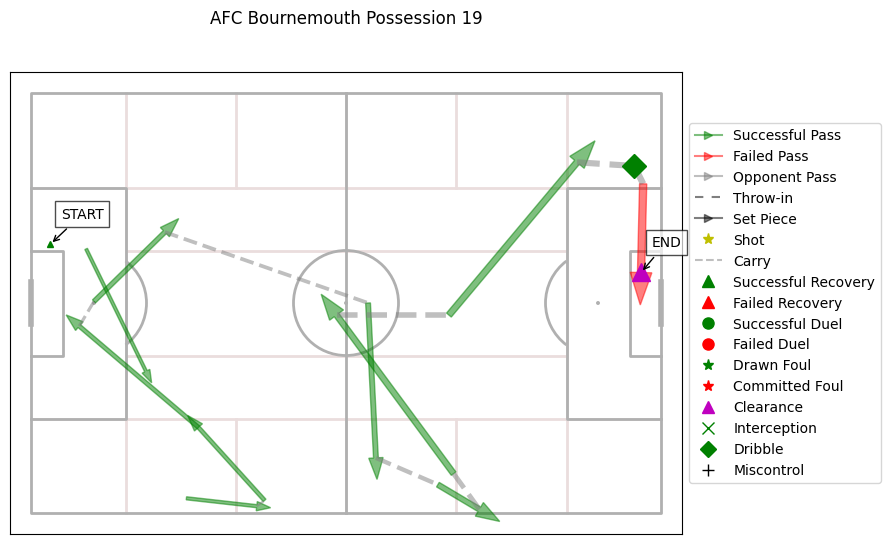

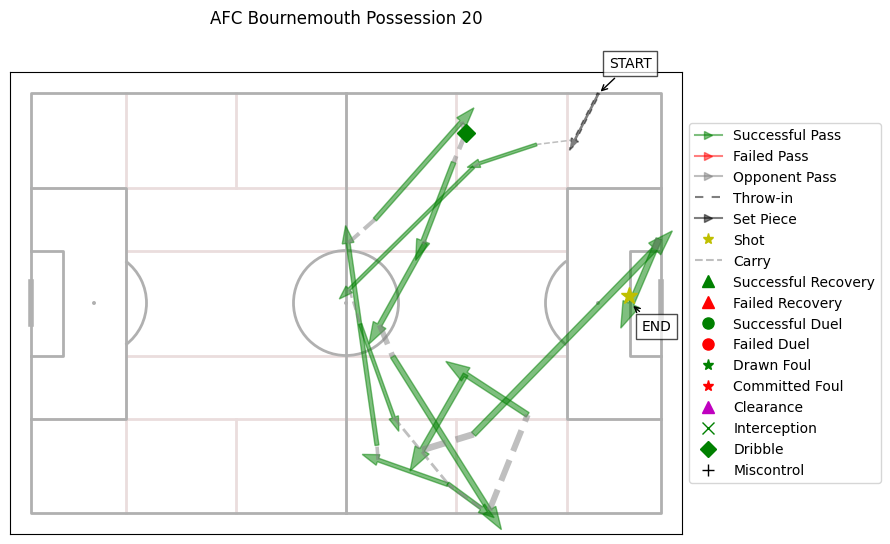

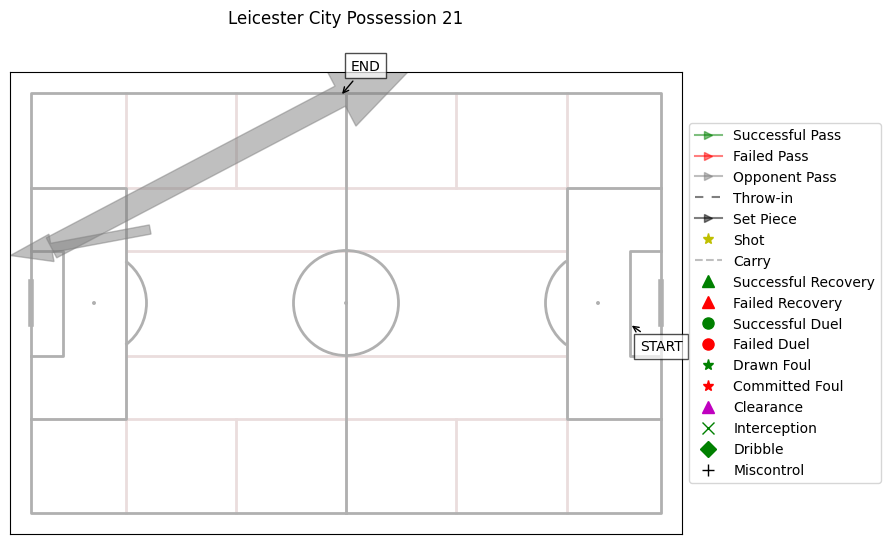

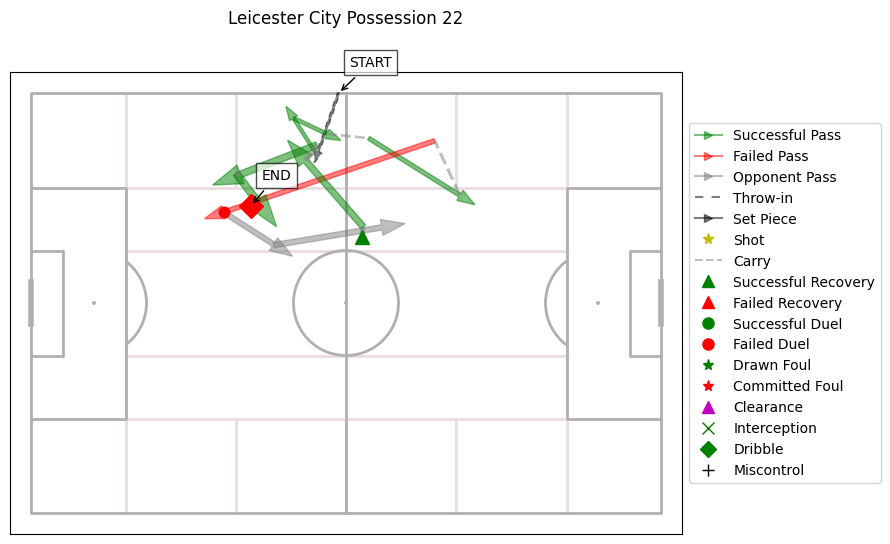

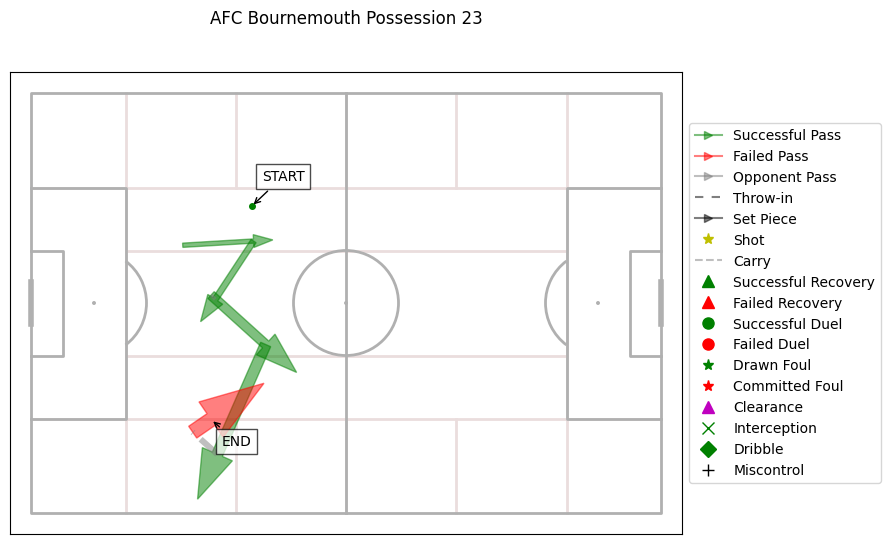

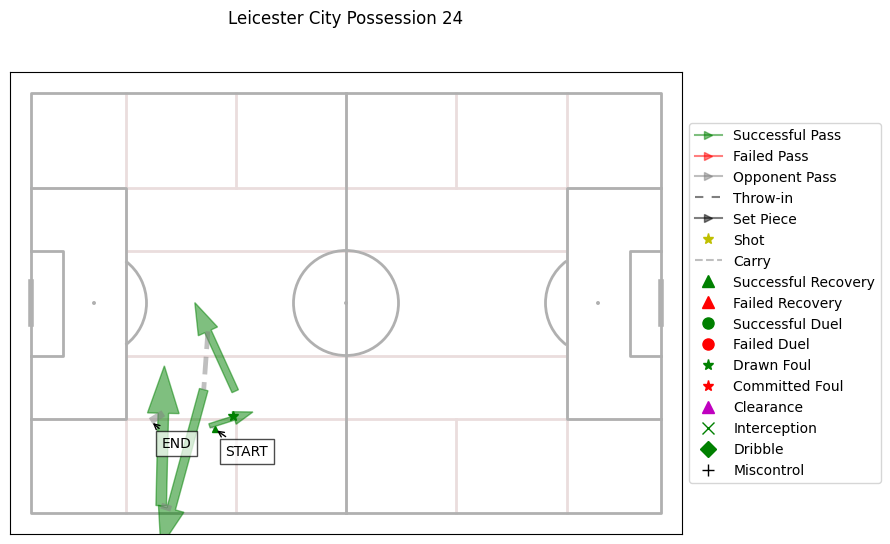

In [140]:
def plot_possession(possession):
    possession_events = ordered_events[ordered_events["possession"] == possession]
    team = possession_events["possession_team"].unique()[0]
    
    # Create pitch visualization
    pitch = Pitch(positional=True, axis=True)
    fig, ax = plt.subplots(figsize=(10, 6))
    pitch.draw(ax=ax)
    
    # Sort events by timestamp and calculate width increment
    possession_events = possession_events.sort_values(by=["timestamp"], ascending=True)
    min_width = .5
    max_width = 5
    width_increment = (max_width - min_width) / len(possession_events)
    
    # Get first and last event locations
    first_event = possession_events.iloc[0]
    last_event = possession_events.iloc[-1]
    start_x, start_y = first_event["location"]
    end_x, end_y = last_event["location"]
    
    # Plot each event
    j=0
    for i, event in possession_events.iterrows():
        x, y = event["location"]
        event_team = event["team"]
        width = min_width + j * width_increment
        marker_size = 4 + j * 2

        if event["type"] in ["Corner", "Free Kick", "Throw-in"] and "end_loc" in event and isinstance(event["end_loc"], list):
            end_x, end_y = event["end_loc"]
            color = 'k'
            linestyle = (0, (4, 4, 4, 4)) if event["type"] == "Throw-in" else '-'
            if event_team != team:
                color = 'gray'
            plt.arrow(x, y, end_x-x, end_y-y, color=color, alpha=0.5, width=width, ls=linestyle)
            
        elif event["type"] == "Pass" and "end_loc" in event and isinstance(event["end_loc"], list):
            end_x, end_y = event["end_loc"]
            color = 'g' if event["outcome"] else 'r'
            if event_team != team:
                color = 'gray'
            plt.arrow(x, y, end_x-x, end_y-y, color=color, alpha=0.5, width=width, ls='-')
            
        elif event["type"] == "Shot":
            plt.plot(x, y, 'y*', markersize=marker_size)
            
        elif event["type"] == "Ball Recovery":
            if event_team != team:
                color = 'r' if event["outcome"] else 'g'
            else:
                color = 'r' if not event["outcome"] else 'g'
            plt.plot(x, y, f'{color}^', markersize=marker_size)
            
        elif event["type"] == "Carry" and "end_loc" in event and isinstance(event["end_loc"], list):
            end_x, end_y = event["end_loc"]
            plt.plot([x, end_x], [y, end_y], color='gray', alpha=0.5, linewidth=1+j, linestyle='--')
            
        elif event["type"] == "Duel":
            if event_team != team:
                color = 'r' if event["outcome"] else 'g'  # Opponent won duel = red
            else:
                color = 'r' if not event["outcome"] else 'g'  # Team won duel = green
            plt.plot(x, y, f'{color}o', markersize=marker_size)
            
        elif event["type"] == "Foul Committed":
            if event_team != team:
                color = 'g' if event["outcome"] else 'r'
            else:
                color = 'r' if event["outcome"] else 'g'
            plt.plot(x, y, f'{color}*', markersize=marker_size)
            
        elif event["type"] == "Clearance":
            plt.plot(x, y, 'm^', markersize=marker_size)

        elif event["type"] == "Interception":
            if event_team != team:
                color = 'r' if event["outcome"] else 'g'
            else:
                color = 'r' if not event["outcome"] else 'g'
            plt.plot(x, y, f'{color}x', markersize=marker_size)
            
        elif event["type"] == "Dribble":
            if event_team != team:
                color = 'r' if event["outcome"] else 'g'
            else:
                color = 'r' if not event["outcome"] else 'g'
            plt.plot(x, y, f'{color}D', markersize=marker_size)
            
        elif event["type"] == "Miscontrol":
            plt.plot(x, y, 'k+', markersize=marker_size)
            
        j+=width_increment
    
    # Add start and end text annotations
    offset = 5
    start_offset = offset if start_y > 40 else -offset
    end_offset = offset if end_y > 40 else -offset
    plt.annotate('START', xy=(start_x, start_y), xytext=(start_x+2, start_y+start_offset),
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.7),
                arrowprops=dict(arrowstyle='->'))
    plt.annotate('END', xy=(end_x, end_y), xytext=(end_x+2, end_y+end_offset),
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.7),
                arrowprops=dict(arrowstyle='->'))
    
    # Add title after annotations to ensure it's on top
    plt.title(f"{team} Possession {possession}", pad=35)  # Added padding to avoid overlap
            
    # Add legend
    legend_elements = [
        plt.Line2D([0], [0], color='g', marker='>', linestyle='-', label='Successful Pass', alpha=0.5),
        plt.Line2D([0], [0], color='r', marker='>', linestyle='-', label='Failed Pass', alpha=0.5),
        plt.Line2D([0], [0], color='gray', marker='>', linestyle='-', label='Opponent Pass', alpha=0.5),
        plt.Line2D([0], [0], color='k', linestyle=(0, (4, 4, 4, 4)), label='Throw-in', alpha=0.5),
        plt.Line2D([0], [0], color='k', marker='>', linestyle='-', label='Set Piece', alpha=0.5),
        plt.Line2D([0], [0], color='y', marker='*', linestyle='none', label='Shot', markersize=8),
        plt.Line2D([0], [0], color='gray', linestyle='--', label='Carry', alpha=0.5),
        plt.Line2D([0], [0], color='g', marker='^', linestyle='none', label='Successful Recovery', markersize=8),
        plt.Line2D([0], [0], color='r', marker='^', linestyle='none', label='Failed/Opponent Recovery', markersize=8),
        plt.Line2D([0], [0], color='g', marker='o', linestyle='none', label='Successful Duel', markersize=8),
        plt.Line2D([0], [0], color='r', marker='o', linestyle='none', label='Failed Duel', markersize=8),
        plt.Line2D([0], [0], color='g', marker='*', linestyle='none', label='Drawn Foul', markersize=8),
        plt.Line2D([0], [0], color='r', marker='*', linestyle='none', label='Committed Foul', markersize=8),
        plt.Line2D([0], [0], color='m', marker='^', linestyle='none', label='Clearance', markersize=8),
        plt.Line2D([0], [0], color='g', marker='x', linestyle='none', label='Interception', markersize=8),
        plt.Line2D([0], [0], color='g', marker='D', linestyle='none', label='Dribble', markersize=8),
        plt.Line2D([0], [0], color='k', marker='+', linestyle='none', label='Miscontrol', markersize=8),
    ]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
for possession in ordered_events["possession"].unique()[:20]:
    plot_possession(possession)

In [148]:
# def plot_possession(possession):
#     possession_events = ordered_events[ordered_events["possession"] == possession]
#     team = possession_events["possession_team"].unique()[0]
    
#     # Create pitch visualization
#     pitch = Pitch(positional=True, axis=True)
#     fig, ax = plt.subplots(figsize=(10, 6))
#     pitch.draw(ax=ax)
    
#     # Sort events by timestamp and calculate width increment
#     possession_events = possession_events.sort_values(by=["timestamp"], ascending=True)
#     min_width = .5
#     max_width = 5
#     width_increment = (max_width - min_width) / len(possession_events)
    
#     # Get first and last event locations
#     first_event = possession_events.iloc[0]
#     last_event = possession_events.iloc[-1]
#     start_x, start_y = first_event["location"]
#     end_x, end_y = last_event["location"]
    
#     # Plot each event
#     j=0
#     for i, event in possession_events.iterrows():
#         x, y = event["location"]
#         event_team = event["team"]
#         width = min_width + j * width_increment
#         marker_size = 4 + j * 2

#         if event["type"] == "Pass" and "pass_end_location" in event and isinstance(event["pass_end_location"], list):
#             end_x, end_y = event["pass_end_location"]
#             incomplete_outcomes = {"Incomplete", "Out", "Injury Clearance", "Pass Offside", "Unknown"}
#             color = 'g' if event.get("pass_outcome") not in incomplete_outcomes else 'r'
#             linestyle = (0, (4, 4, 4, 4)) if event["pass_type"] == "Throw-in" else '-'
            
#             if event["pass_type"] in ["Corner", "Free Kick"]:
#                 color = 'k'
#             if event_team != team:
#                 color = 'gray'
                
#             plt.arrow(x, y, end_x-x, end_y-y, color=color, alpha=0.5, width=width, ls=linestyle)
            
#         elif event["type"] == "Shot":
#             plt.plot(x, y, 'y*', markersize=marker_size)
            
#         elif event["type"] == "Ball Recovery":
#             failed_recovery = (event["ball_recovery_recovery_failure"] == True and event_team == team)
#             opponent_recovery = (event["ball_recovery_recovery_failure"] != True and event_team != team)
#             color = 'r' if failed_recovery or opponent_recovery else 'g'
#             plt.plot(x, y, f'{color}^', markersize=marker_size)
            
#         elif event["type"] == "Carry" and "carry_end_location" in event and isinstance(event["carry_end_location"], list):
#             end_x, end_y = event["carry_end_location"]
#             plt.plot([x, end_x], [y, end_y], color='gray', alpha=0.5, linewidth=1+j, linestyle='--')
            
#         elif event["type"] == "Duel":
#             lost = "Lost" in event["duel_type"] or "Lost" in event["duel_outcome"]
#             if event_team != team:
#                 lost = not lost  # Flip the outcome for opponent team
#             color = 'r' if lost else 'g'
#             plt.plot(x, y, f'{color}o', markersize=marker_size)
            
#         elif event["type"] == "Foul Committed":
#             color = 'g' if event_team != team else 'r'
#             plt.plot(x, y, f'{color}*', markersize=marker_size)
            
#         elif event["type"] == "Clearance":
#             plt.plot(x, y, 'm^', markersize=marker_size)

#         elif event["type"] == "Interception":
#             interception_outcome = not ("Lost" in event.get('interception_outcome'))
#             if interception_outcome & (event_team == team):
#                 color = 'g'
#             elif interception_outcome & (event_team != team):
#                 color = 'r'
#             elif not interception_outcome & (event_team != team):
#                 color = 'g'
#             else:
#                 color = 'r'
#             plt.plot(x, y, f'{color}x', markersize=marker_size)
#         elif event["type"] == "Dribble":
#             dribble_outcome = "Complete"==event.get('dribble_outcome')
#             if dribble_outcome & (event_team == team):
#                 color = 'g'         
#             else:
#                 color = 'r'
#             plt.plot(x, y, f'{color}D', markersize=marker_size)
#         elif event["type"] == "Miscontrol":
#             plt.plot(x, y, 'k+', markersize=marker_size)
            
#         j+=width_increment
    
#     # Add start and end text annotations
#     offset = 5
#     start_offset = offset if start_y > 40 else -offset
#     end_offset = offset if end_y > 40 else -offset
#     plt.annotate('START', xy=(start_x, start_y), xytext=(start_x+2, start_y+start_offset),
#                 bbox=dict(facecolor='white', edgecolor='black', alpha=0.7),
#                 arrowprops=dict(arrowstyle='->'))
#     plt.annotate('END', xy=(end_x, end_y), xytext=(end_x+2, end_y+end_offset),
#                 bbox=dict(facecolor='white', edgecolor='black', alpha=0.7),
#                 arrowprops=dict(arrowstyle='->'))
    
#     # Add title after annotations to ensure it's on top
#     plt.title(f"{team} Possession {possession}", pad=35)  # Added padding to avoid overlap
            
#     # Add legend
#     legend_elements = [
#         plt.Line2D([0], [0], color='g', marker='>', linestyle='-', label='Completed Pass', alpha=0.5),
#         plt.Line2D([0], [0], color='r', marker='>', linestyle='-', label='Incomplete Pass', alpha=0.5),
#         plt.Line2D([0], [0], color='gray', marker='>', linestyle='-', label='Opponent Pass', alpha=0.5),
#         plt.Line2D([0], [0], color='k', linestyle=(0, (4, 4, 4, 4)), label='Throw-in', alpha=0.5),
#         plt.Line2D([0], [0], color='k', marker='>', linestyle='-', label='Corner/Free Kick', alpha=0.5),
#         plt.Line2D([0], [0], color='y', marker='*', linestyle='none', label='Shot', markersize=8),
#         plt.Line2D([0], [0], color='g', marker='^', linestyle='none', label='Ball Recovery', markersize=8),
#         plt.Line2D([0], [0], color='r', marker='^', linestyle='none', label='Failed/Opponent Recovery', markersize=8),
#         plt.Line2D([0], [0], color='gray',linestyle=(0, (4, 4, 4, 4)), label='Carry', alpha=0.5),
#         plt.Line2D([0], [0], color='g', marker='o', linestyle='none', label='Duel Won', markersize=8),
#         plt.Line2D([0], [0], color='r', marker='o', linestyle='none', label='Duel Lost', markersize=8),
#         plt.Line2D([0], [0], color='g', marker='*', linestyle='none', label='Foul Won', markersize=8),
#         plt.Line2D([0], [0], color='r', marker='*', linestyle='none', label='Foul Committed', markersize=8),
#         plt.Line2D([0], [0], color='m', marker='^', linestyle='none', label='Clearance', markersize=8),
#         plt.Line2D([0], [0], color='g', marker='x', linestyle='none', label='Interception', markersize=8),
#         plt.Line2D([0], [0], color='g', marker='D', linestyle='none', label='Dribble', markersize=8),
#         plt.Line2D([0], [0], color='k', marker='+', linestyle='none', label='Miscontrol', markersize=8),
#     ]
#     plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()

# for possession in ordered_events["possession"].unique()[:20]:
#     plot_possession(possession)

# Adding the xG of a shot during possession to all events during possession

In [142]:
# Get all shots and their xG values
shots = ordered_events[ordered_events.type == "Shot"]
#Deduplicate by possession (e.g., keeping the first shot)
shots_dedup = shots.drop_duplicates(subset="possession")[["shot_statsbomb_xg", "possession"]] # first shot in possession
shots_max = shots.groupby("possession")[["shot_statsbomb_xg"]].max().reset_index() # max xG in possession
shots_sum = shots.groupby("possession")[["shot_statsbomb_xg"]].sum().reset_index() # sum xG in possession

ordered_events = ordered_events.merge(shots_max.rename(columns={"shot_statsbomb_xg": "max_xg_in_possession"}), 
                                      on="possession", how="left")



In [143]:
# Filter events that are part of possessions with shots (non-null max_xg)
events_with_shots = ordered_events[ordered_events['max_xg_in_possession'].notna()]
print(f"Number of events in possessions with shots: {len(events_with_shots)}")
print("\nSample of events with shots:")
display(events_with_shots.head(5))


Number of events in possessions with shots: 313

Sample of events with shots:


,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,dribble_nutmeg,dribble_outcome,dribble_overrun,...,shot_technique,shot_type,team,team_id,timestamp,type,under_pressure,outcome,end_loc,max_xg_in_possession
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AFC Bournemouth,28,00:01:05.446,Pass,True,True,"[42.6, 36.5]",0.020838
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AFC Bournemouth,28,00:01:08.273,Pass,NaN,True,"[28.3, 35.0]",0.020838
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AFC Bournemouth,28,00:01:09.646,Pass,True,True,"[36.4, 43.2]",0.020838
32,NaN,"[35.1, 41.9]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AFC Bournemouth,28,00:01:10.975,Carry,True,NaN,"[35.1, 41.9]",0.020838
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AFC Bournemouth,28,00:01:12.957,Pass,True,True,"[27.4, 50.4]",0.020838


# Finding how possessions start

In [145]:
#how possessions start
ordered_events.groupby("possession").first()[["type","pass_outcome","duel_outcome","pass_type"]].head(50)




,type,pass_outcome,duel_outcome,pass_type
possession,,,,
2,Pass,Out,None,Kick Off
3,Duel,Incomplete,Success In Play,Recovery
4,Pass,None,Won,Recovery
5,Throw-in,Incomplete,None,Throw-in
6,Throw-in,None,Lost Out,Throw-in
7,Throw-in,None,None,Throw-in
8,Throw-in,Incomplete,None,Throw-in
9,Pass,None,None,Recovery
10,Throw-in,Incomplete,None,Throw-in
